In [1]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed'
os.chdir(directory)

In [2]:
gendf = pd.DataFrame
contentlist = []
for path in glob.glob("generationdata_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    gendf = pd.concat(contentlist)

In [10]:
gendf.Elongation_Rate.corr(gendf.CV_Cartesian_Displacement,method='pearson')

-0.047668723799521161

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


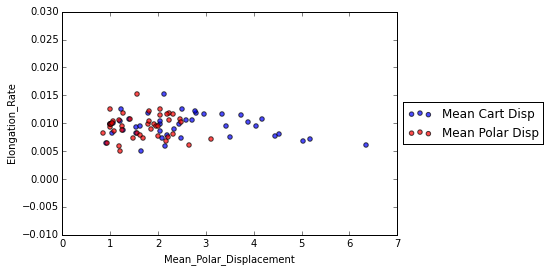

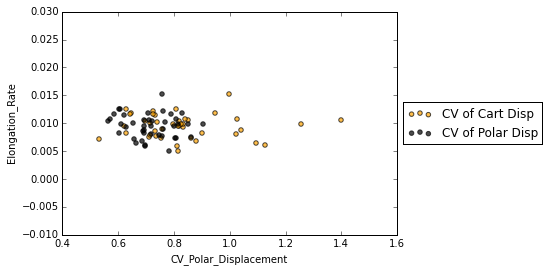

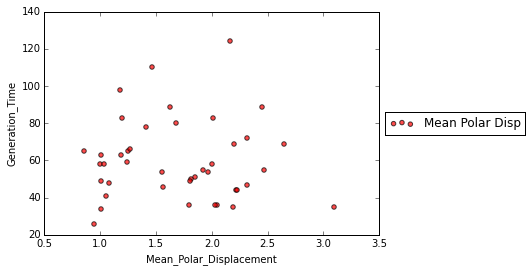

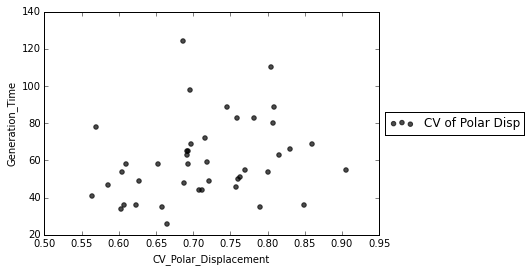

In [6]:
ax = gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'Mean Cart Disp',color='Blue')
gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Elongation_Rate',alpha=0.7,label = 'Mean Polar Disp', color='Red', ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2= gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Cart Disp', color='Orange')
gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Elongation_Rate', alpha=0.7,label = 'CV of Polar Disp', color='Black',ax=ax2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax3=gendf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Generation_Time',alpha=0.7,label = 'Mean Polar Disp', color='Red')
#gendf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'Mean Cart Disp',color='Blue', ax=ax3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4= gendf.plot(kind='scatter', x = 'CV_Polar_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Polar Disp', color='Black')
#gendf.plot(kind='scatter', x = 'CV_Cartesian_Displacement', y = 'Generation_Time', alpha=0.7,label = 'CV of Cart Disp', color='Orange',ax=ax4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b07c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112626198>]], dtype=object)

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


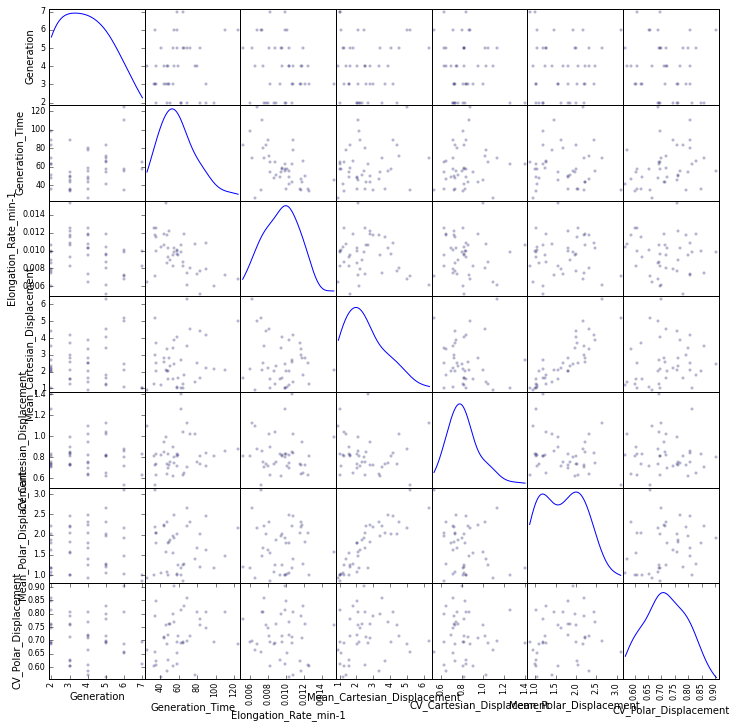

In [31]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(gendf, alpha=0.2, figsize=(12, 12), diagonal='kde')